In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Convolutional Neural Networks expect input data to be in the form of 4D tensors:
(num_samples, height, width, channels)

In MNIST, each image is a 28 X 28 grayscale image

In grayscale images, number of channels is 1

We are also one-hot encoding each pixel of the data, which is done by the to_categorical function

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.2994 - accuracy: 0.9075 - val_loss: 0.0524 - val_accuracy: 0.9832
Epoch 2/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.0967 - accuracy: 0.9720 - val_loss: 0.0349 - val_accuracy: 0.9871
Epoch 3/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0715 - accuracy: 0.9797 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 4/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.0560 - accuracy: 0.9841 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 5/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0289 - val_accuracy: 0.9910
Epoch 6/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0408 - accuracy: 0.9883 - val_loss: 0.0251 - val_accuracy: 0.9913
Epoch 7/10
60000/60000 [==========================

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')

Test accuracy: 99.33%


In [33]:
predictions = model.predict(X_test)
predictions

array([[1.2205565e-18, 2.7901611e-14, 2.5127365e-14, ..., 1.0000000e+00,
        5.9505682e-15, 5.0651860e-10],
       [3.5145413e-12, 5.1683102e-10, 1.0000000e+00, ..., 1.1187824e-10,
        2.5877409e-10, 6.6635777e-14],
       [2.6375877e-19, 1.0000000e+00, 3.1864425e-13, ..., 1.1724180e-10,
        6.8017006e-13, 1.8174676e-14],
       ...,
       [1.1336154e-21, 3.8022730e-14, 1.1742552e-15, ..., 1.9793554e-14,
        6.6888969e-13, 9.2400995e-14],
       [9.1186707e-16, 1.6528466e-13, 3.2770336e-16, ..., 5.1726105e-17,
        3.3763456e-06, 1.0891894e-12],
       [2.1374418e-17, 1.4260908e-15, 8.8925349e-18, ..., 6.9043722e-22,
        4.1994772e-14, 5.4437071e-19]], dtype=float32)

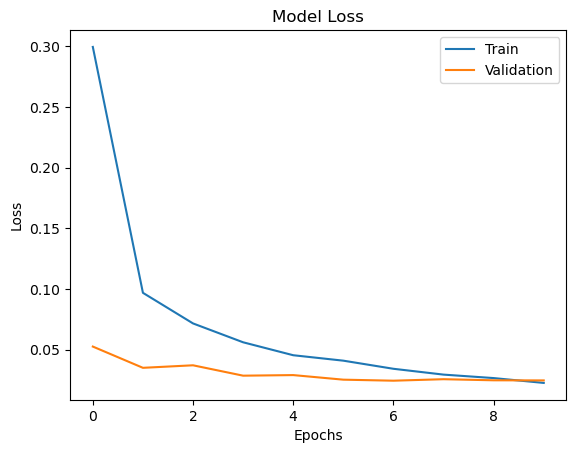

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()